<a href="https://colab.research.google.com/github/hsallrounder/Neural-Networks-Workshop-2023/blob/main/CNN_in_MNIST_Neural_Networks_Workshop_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [3]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
'''
When using a convolutional layer as the first layer to our model,
 we need to reshape our data to (n_images, x_shape, y_shape, channels).
   All you really need to know is that you should set channels to 1 for grayscale images
    and set channels to 3 when youhave a set of RGB-images as input. 
'''

'\nWhen using a convolutional layer as the first layer to our model,\n we need to reshape our data to (n_images, x_shape, y_shape, channels).\n   All you really need to know is that you should set channels to 1 for grayscale images\n    and set channels to 3 when youhave a set of RGB-images as input. \n'

In [4]:
train_X.shape

(60000, 28, 28, 1)

In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test = test_X / 255

In [6]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=4)

Epoch 1/4
938/938 [==============================] - 130s 138ms/step - loss: 0.4714 - accuracy: 0.8308
Epoch 2/4
938/938 [==============================] - 99s 105ms/step - loss: 0.3215 - accuracy: 0.8846
Epoch 3/4
938/938 [==============================] - 99s 106ms/step - loss: 0.2826 - accuracy: 0.8984
Epoch 4/4
938/938 [==============================] - 97s 104ms/step - loss: 0.2533 - accuracy: 0.9067


In [9]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 54.9495 - accuracy: 0.8148
Test loss 54.94947052001953
Test accuracy 0.8148000240325928


In [10]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 6s 17ms/step
9


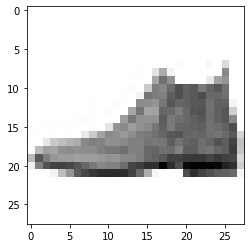

In [11]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

313/313 [==============================] - 5s 17ms/step
2


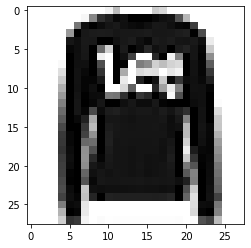

In [15]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

313/313 [==============================] - 4s 13ms/step
1


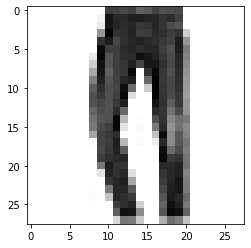

In [16]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[5])))

plt.imshow(test_X[5].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

313/313 [==============================] - 4s 14ms/step
4


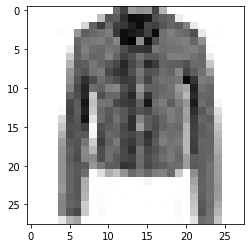

In [17]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[10])))

plt.imshow(test_X[10].reshape(28, 28), cmap = plt.cm.binary)
plt.show()